# Now let’s understand Random Forest with the help of code.

# 1. Let’s import the libraries.

In [37]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier,plot_tree
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve,roc_auc_score


import seaborn as sns
import matplotlib.pyplot as plt

# 2. import Dataset

In [3]:
df  = pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [4]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


# 3. Sampling to balance outcome of dataset

In [7]:
x1= df.drop("Outcome",axis=1)
y1=df["Outcome"]


In [8]:
smt = SMOTE()
x,y = smt.fit_resample(x1,y1)

# 4.Train test splite

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=31,stratify=y)

# 5.model builting before hyperparameter

In [10]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

# 6.Model evaluation before hyperparameter

In [13]:
#Training Data Evaluation

y_pred_train = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train) 
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80) 

accuracy = accuracy_score(y_train,y_pred_train) 
print("Accuracy :",accuracy)

print("*"*80) 

clf_report = classification_report(y_train,y_pred_train) 
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[400   0]
 [  0 400]]
********************************************************************************
Accuracy : 1.0
********************************************************************************
classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [14]:
#Testing Data Evaluation

y_pred = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)
print("*"*80)
clf_report = classification_report(y_test,y_pred) 
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[72 28]
 [28 72]]
********************************************************************************
Accuracy : 0.72
********************************************************************************
classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       100
           1       0.72      0.72      0.72       100

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200



# 7.Checking for Decision tree

In [15]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
#Training Data Evaluation

y_pred_train = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train) 
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80) 

accuracy = accuracy_score(y_train,y_pred_train) 
print("Accuracy :",accuracy)

print("*"*80) 

clf_report = classification_report(y_train,y_pred_train) 
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[400   0]
 [  0 400]]
********************************************************************************
Accuracy : 1.0
********************************************************************************
classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [17]:
#Testing Data Evaluation

y_pred = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)
print("*"*80)
clf_report = classification_report(y_test,y_pred) 
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[72 28]
 [28 72]]
********************************************************************************
Accuracy : 0.72
********************************************************************************
classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       100
           1       0.72      0.72      0.72       100

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200



# Random forest hyperparameter tunning

In [27]:
rf_model = RandomForestClassifier()

hyperparameters = {'n_estimators':np.arange(10,100),
                    'criterion':['gini','entropy'],
                    'max_depth':np.arange(3,8),  
                    'min_samples_split':np.arange(4,20),
                    'min_samples_leaf':np.arange(3,10),
                   'oob_score' : ["True"],
                    'random_state':[11]
                   }

rscv_rf_model = RandomizedSearchCV(rf_model,hyperparameters,cv = 7) 
rscv_rf_model.fit(x_train,y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99]),
                                        'oob_score': ['True'],
                                        'random_state': [11]})

In [28]:
rscv_rf_model.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=7,
                       n_estimators=24, oob_score='True', random_state=11)

# model creation after hyperparameter

In [29]:
rf_model = rscv_rf_model.best_estimator_
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=7,
                       n_estimators=24, oob_score='True', random_state=11)

# evaluation after hyperparameter

In [30]:
#Training Data Evaluation

y_pred_train = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train) 
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80) 

accuracy = accuracy_score(y_train,y_pred_train) 
print("Accuracy :",accuracy)

print("*"*80) 

clf_report = classification_report(y_train,y_pred_train) 
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[344  56]
 [ 34 366]]
********************************************************************************
Accuracy : 0.8875
********************************************************************************
classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       400
           1       0.87      0.92      0.89       400

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



In [31]:
#Testing Data Evaluation

y_pred = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)
print("*"*80)
clf_report = classification_report(y_test,y_pred) 
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[69 31]
 [26 74]]
********************************************************************************
Accuracy : 0.715
********************************************************************************
classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       100
           1       0.70      0.74      0.72       100

    accuracy                           0.71       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.72      0.71      0.71       200



In [32]:
s1 = pd.Series(rf_model.feature_importances_,index = x.columns)
s1.sort_values()

BloodPressure               0.044255
SkinThickness               0.044818
Insulin                     0.073475
DiabetesPedigreeFunction    0.081742
Age                         0.160022
BMI                         0.223507
Glucose                     0.372182
dtype: float64

<AxesSubplot:>

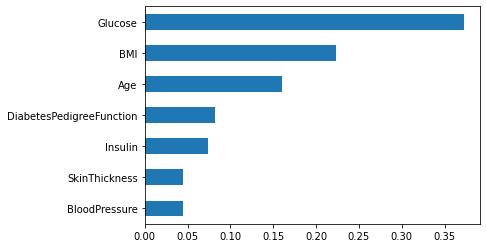

In [33]:
s1.sort_values().plot(kind = "barh")

In [34]:
rf_model.oob_score

'True'

In [35]:
rf_model.oob_score_

0.81